In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

## Hyperparameter optimization tables

First we generate hyperparameter optimization tables for all models M0x (no pooling), M1x (pooling) for strict and full test sets.

In [15]:
pd.set_option("display.precision", 3)

In [16]:
for s in ['','_full']:
    for num in ['01','02','03','04','05','11','12','13','14','15']:
        name = "M"+num+s
        
        metrics = pd.read_csv("./metrics/metrics_"+name+".csv").set_index('Model').dropna()
        tex_content = metrics.style.highlight_max(color = 'lightgreen', axis = 0, subset=["MCC"])\
            .highlight_max(color = 'lightblue', axis=0, subset=["Accuracy", "Precision", "Recall", "Specificity", "F1"])\
            .to_latex()
        re_borders = re.compile(r"begin\{tabular\}\{([^\}]+)\}")
        borders = re_borders.findall(tex_content)[0]
        borders = '|'.join(list(borders))
        tex_content = re_borders.sub("begin{tabular}{|" + borders + "|}", tex_content)
        
        f = open("./latex/styled_"+name,"w+")
        f.write(tex_content)
        f.close()

## Effect of depth on performance

To examine the effect of network depth on model performance, we generate metrics tables across models with best hyperparameter optimization configurations.
Separate tables are generated for M0x and M1x models. We stylize and save latex-format versions to <code>./latex/styled_best_Mxx</code>

We compare best models with no pooling (M01 - M05) first.

In [3]:
best_configs = {}
rows = []
num_layers = 2
for s in ['']:
    for num in ['01','02','03','04','05']:
        name = "M"+num+s
    
        metrics = pd.read_csv("./metrics/metrics_"+name+".csv").dropna()

        # ind is the bool series for the best config, index is the row number
        ind = metrics['MCC']==max(metrics['MCC'])
        index = [x for x in range(len(ind)) if ind[x]][0]

        # This gives the best hyperparam config for this model
        best_config = metrics.loc[ind, 'Model']
        try:
            best_configs[name] = list(best_config)[0]
        except:
            print(name)

        # Drop model from metrics
        metrics = metrics.drop('Model', axis=1)
        best_config_row = metrics.loc[index]
        best_config_row['# Layers'] = str(num_layers)
        
        num_layers += 1
        rows.append(best_config_row)

best = pd.DataFrame(rows).set_index('# Layers')

tex_content = best.style.highlight_max(color = 'lightgreen', axis = 0, subset=["MCC"])\
            .highlight_max(color = 'lightblue', axis=0, subset=["Accuracy", "Precision", "Recall", "Specificity", "F1"])\
            .to_latex()
re_borders = re.compile(r"begin\{tabular\}\{([^\}]+)\}")
borders = re_borders.findall(tex_content)[0]
borders = '|'.join(list(borders))
tex_content = re_borders.sub("begin{tabular}{|" + borders + "|}", tex_content)

f = open("./latex/styled_best_0X","w+")
f.write(tex_content)
f.close()

The no-pooling results table:

In [ ]:
best

Then we compare across models with pooling:

In [4]:
best_configs = {}
rows = []
num_layers = 2
for s in ['']:
    for num in ['11','12','13','14','15']:
        name = "M"+num+s
    
        metrics = pd.read_csv("./metrics/metrics_"+name+".csv").dropna().reset_index(drop=True)

        # ind is the bool series for the best config, index is the row number
        ind = metrics['MCC']==max(metrics['MCC'])
        index = [c for c,x in enumerate(ind) if ind[c]][0]

        # This gives the best hyperparam config for this model
        best_config = metrics.loc[ind, 'Model']
        try:
            best_configs[name] = list(best_config)[0]
        except:
            print(name)

        # Drop model from metrics
        metrics = metrics.drop('Model', axis=1)
        best_config_row = metrics.loc[index]
        best_config_row['# Layers'] = str(num_layers)
        
        num_layers += 1
        rows.append(best_config_row)

bestP = pd.DataFrame(rows).set_index('# Layers')

tex_content = bestP.style.highlight_max(color = 'lightgreen', axis = 0, subset=["MCC"])\
            .highlight_max(color = 'lightblue', axis=0, subset=["Accuracy", "Precision", "Recall", "Specificity", "F1"])\
            .to_latex()
re_borders = re.compile(r"begin\{tabular\}\{([^\}]+)\}")
borders = re_borders.findall(tex_content)[0]
borders = '|'.join(list(borders))
tex_content = re_borders.sub("begin{tabular}{|" + borders + "|}", tex_content)

f = open("./latex/styled_best_1X","w+")
f.write(tex_content)
f.close()

The pooling results table:

In [7]:
bestP 

,Accuracy,Precision,Recall,Specificity,F1,MCC
# Layers,,,,,,
2,0.864,0.361,0.284,0.937,0.318,0.246
3,0.871,0.372,0.228,0.952,0.283,0.224
4,0.870,0.374,0.249,0.948,0.299,0.236
5,0.866,0.362,0.259,0.943,0.302,0.234
6,0.869,0.379,0.279,0.943,0.322,0.254


## Effect of depth on Accuracy and Recall

We analyze this through plotting paired barcharts of accuracy by layer and by pooling, then through scatterplots.

In [16]:
#best = best.reset_index()
#bestP = bestP.reset_index()

x = [2,3,4,5,6]
y = best['Accuracy']
yP = bestP['Accuracy']

y2 = best['Recall']
y2P = bestP['Recall']

dy = [y[x] - yP[x] for x in range(len(y))]

TypeError: set_ticks() takes 2 positional arguments but 3 were given

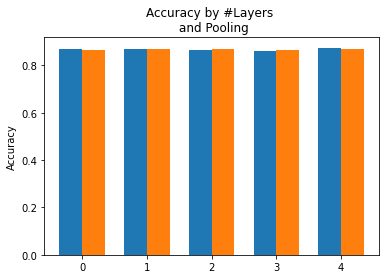

In [31]:
labels = ['2', '3', '4', '5', '6']

x = np.arange(len(y))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y, width, label='No Pooling')
rects2 = ax.bar(x + width/2, yP, width, label='Pooling')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by #Layers \n and Pooling')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

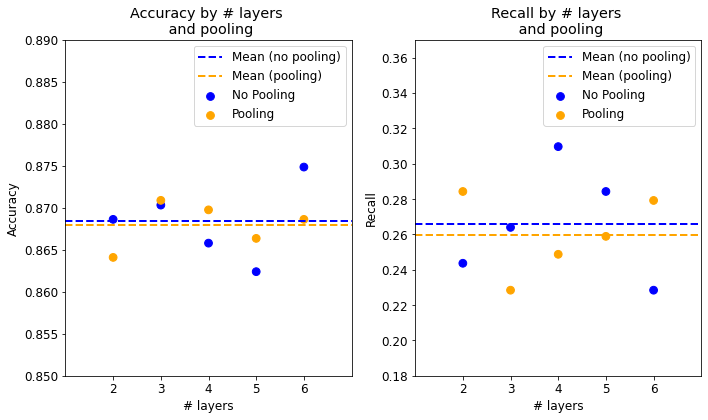

In [59]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

#plt.style.use('_mpl-gallery')

# make the data

# size and color:
sizes = [60 for x in range(len(x))]

# plot
fig, ax = plt.subplots(nrows=1, ncols=2)


ax[0].scatter(x, y, s=sizes, c="b", label="No Pooling")
ax[0].scatter(x, yP, s=sizes, c="orange", label="Pooling")

ax[0].set(xlim=(1, 7), xticks=np.arange(2, 7),
       ylim=(0.85, 0.89), yticks=np.arange(0.85, 0.89, 0.005))
ax[0].axhline(y=sum(y)/len(y), color='b', linewidth=2.0, linestyle='--', label='Mean (no pooling)')
ax[0].axhline(y=sum(yP)/len(yP), color='orange', linewidth=2.0, linestyle='--', label='Mean (pooling)')
#ax[0].xlabel("# Layers")
#.ylabel("Accuracy")
#ax[0].legend()
#ax[0].suptitle

ax[1].scatter(x, y2, s=sizes, c="b", label="No Pooling")
ax[1].scatter(x, y2P, s=sizes, c="orange", label="Pooling")
ax[1].set(xlim=(1, 7), xticks=np.arange(2, 7),
       ylim=(0.18, 0.37), yticks=np.arange(0.18, 0.37, 0.02))
ax[1].axhline(y=sum(y2)/len(y2), color='b', linewidth=2.0, linestyle='--', label='Mean (no pooling)')
ax[1].axhline(y=sum(y2P)/len(y2P), color='orange', linewidth=2.0, linestyle='--', label='Mean (pooling)')
#plt.xlabel("# Layers")
#plt.ylabel("Recall")


ax[0].set(xlabel='# layers', ylabel='Accuracy')
ax[0].legend()
ax[0].title.set_text("Accuracy by # layers \n and pooling")
ax[1].set(xlabel='# layers', ylabel='Recall')
ax[1].title.set_text("Recall by # layers \n and pooling")
ax[0].legend()
fig.set_size_inches(10, 6)
plt.legend()
#plt.figure(figsize=(12,3))
plt.tight_layout()
plt.show()



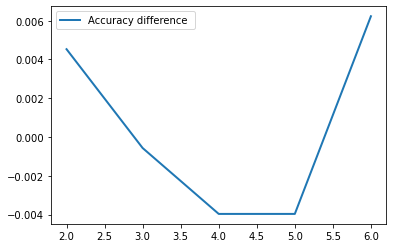

In [25]:
plt.plot(x, dy, linewidth=2.0, label="Accuracy difference by layer")
plt.plot()
plt.legend()
plt.show()

## Effect of depth on MCC

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

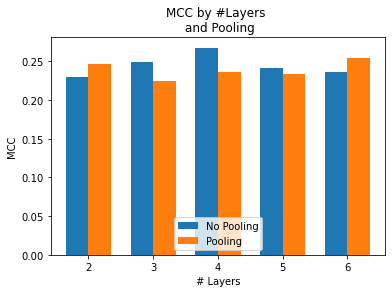

In [11]:
names = ['2', '3', '4', '5', '6']
y = best['MCC']
yP = bestP['MCC']


x = np.arange(len(y))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y, width, label='No Pooling')
rects2 = ax.bar(x + width/2, yP, width, label='Pooling')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('# Layers')
ax.set_title('MCC by #Layers \n and Pooling')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.set
ax.legend(loc='lower center')

ax.bar(rects1, y, padding=3)
ax.bar(rects2, yP, padding=3)

fig.tight_layout()

plt.show()